In [1]:
import os
os.chdir("../")
with open('run/settings.py', 'r') as file:
    exec(file.read())

Random seed set to 333
using device:  cpu


# Configuration (customizable)

In [2]:
overwrite = False
with open('run/configs/synthetic_w_gt.py', 'r') as file:
    exec(file.read())
# without attribute
update_config(model_name = 'syn_gt',
              custom_target_cols = ['label'])
config_dict = get_config_dict()

# Data

In [3]:
# change data preparation for a given experiment
with open('run/prepare_datasets/synthetic.py', 'r') as file:
    exec(file.read())
# prepare model inputs
with open('run/inputs.py', 'r') as file:
    exec(file.read())

{'No trend.': (210, 60, 30), 'The time series shows upward linear trend.': (210, 60, 30), 'The time series shows downward linear trend.': (210, 60, 30), 'The time series shows upward quadratic trend.': (210, 60, 30), 'The time series shows downward quadratic trend.': (210, 60, 30), 'No seasonal pattern.': (210, 60, 30), 'The time series exhibits a seasonal pattern.': (210, 60, 30), 'No sharp shifts.': (210, 60, 30), 'The mean of the time series shifts upwards.': (210, 60, 30), 'The mean of the time series shifts downwards.': (210, 60, 30), 'The time series exhibits low variability.': (210, 60, 30), 'The time series exhibits high variability.': (210, 60, 30)}


final distribution of text prediction
text
No trend. No seasonal pattern. No sharp shifts. The time series exhibits low variability.                                                                                                210
No trend. No seasonal pattern. No sharp shifts. The time series exhibits high variability.         

# Model (customizable)

In [4]:
# overwrite = False
with open('run/model.py', 'r') as file:
    exec(file.read())


Layer (type:depth-idx)                                                      Param #
VITAL                                                                       --
├─TSEncoder: 1-1                                                            --
│    └─LocalNorm: 2-1                                                       --
│    └─MultiCNNEncoder: 2-2                                                 768
│    │    └─ModuleList: 3-1                                                 3,691,408
│    │    └─MultiheadAttention: 3-2                                         2,362,368
│    │    └─LayerNorm: 3-3                                                  1,536
├─TextEncoder: 1-2                                                          --
│    └─TextEncoderAttention: 2-3                                            768
│    │    └─MultiheadAttention: 3-4                                         2,362,368
│    │    └─Linear: 3-5                                                     590,592
│    │    └─GELU

In [5]:
def inspect_model_layers(model):
    """
    Inspect a PyTorch model's layers and print detailed information.
    
    Args:
        model: PyTorch model to inspect
    """
    def count_parameters(module):
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    
    def get_layer_info(module, prefix=''):
        for name, child in module.named_children():
            # Get layer type and parameters
            layer_type = child.__class__.__name__
            params = count_parameters(child)
            
            # Print layer information
            print(f"{prefix}├─ {name} ({layer_type})")
            print(f"{prefix}│  ├─ Parameters: {params:,}")
            
            # Print layer configuration if available
            if hasattr(child, 'in_features') and hasattr(child, 'out_features'):
                print(f"{prefix}│  ├─ Input features: {child.in_features}")
                print(f"{prefix}│  └─ Output features: {child.out_features}")
            elif hasattr(child, 'in_channels') and hasattr(child, 'out_channels'):
                print(f"{prefix}│  ├─ Input channels: {child.in_channels}")
                print(f"{prefix}│  └─ Output channels: {child.out_channels}")
            elif hasattr(child, 'hidden_size'):
                print(f"{prefix}│  ├─ Hidden size: {child.hidden_size}")
                print(f"{prefix}│  └─ Num layers: {child.num_layers}")
            
            # Recursively inspect child modules
            get_layer_info(child, prefix + '│  ')
    
    print("Model Architecture:")
    print("=" * 50)
    total_params = count_parameters(model)
    print(f"Total trainable parameters: {total_params:,}")
    print("=" * 50)
    get_layer_info(model)

# Example usage:
inspect_model_layers(model)

Model Architecture:
Total trainable parameters: 46,987,608
├─ ts_encoder (TSEncoder)
│  ├─ Parameters: 6,056,080
│  ├─ local_norm (LocalNorm)
│  │  ├─ Parameters: 0
│  ├─ encoder_layers (MultiCNNEncoder)
│  │  ├─ Parameters: 6,056,080
│  │  ├─ cnns (ModuleList)
│  │  │  ├─ Parameters: 3,691,408
│  │  │  ├─ 0 (CNNEncoder)
│  │  │  │  ├─ Parameters: 1,231,216
│  │  │  │  ├─ encoder (Sequential)
│  │  │  │  │  ├─ Parameters: 1,231,216
│  │  │  │  │  ├─ 0 (AddChannelDim)
│  │  │  │  │  │  ├─ Parameters: 0
│  │  │  │  │  ├─ 1 (Conv1d)
│  │  │  │  │  │  ├─ Parameters: 1,616
│  │  │  │  │  │  ├─ Input channels: 1
│  │  │  │  │  │  └─ Output channels: 16
│  │  │  │  │  ├─ 2 (ReLU)
│  │  │  │  │  │  ├─ Parameters: 0
│  │  │  │  │  ├─ 3 (BatchNorm1d)
│  │  │  │  │  │  ├─ Parameters: 32
│  │  │  │  │  ├─ 4 (MaxPool1d)
│  │  │  │  │  │  ├─ Parameters: 0
│  │  │  │  │  ├─ 5 (Dropout)
│  │  │  │  │  │  ├─ Parameters: 0
│  │  │  │  │  ├─ 6 (Flatten)
│  │  │  │  │  │  ├─ Parameters: 0
│  │  │  │  │  ├

# Train

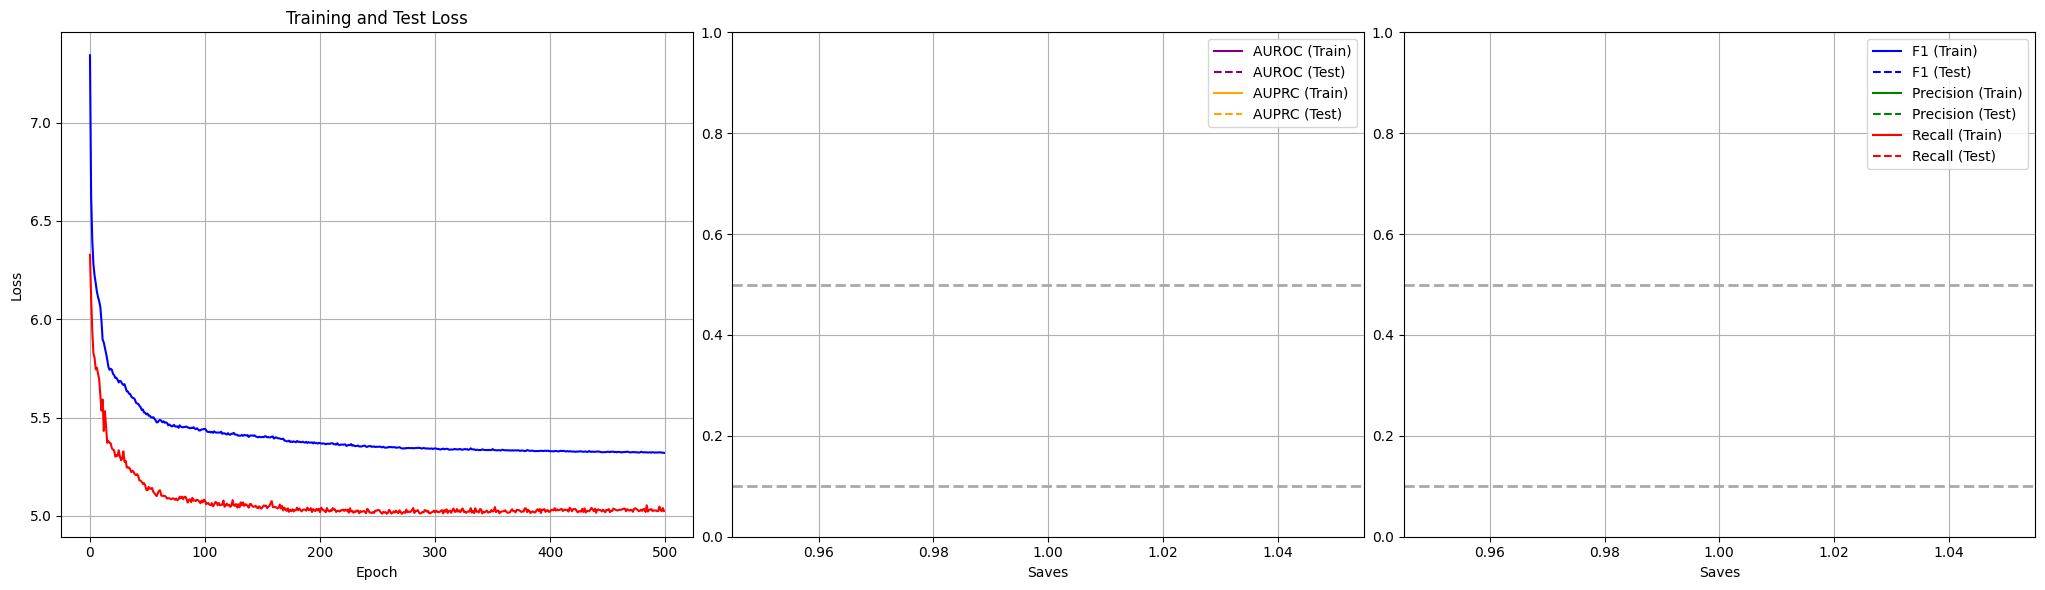

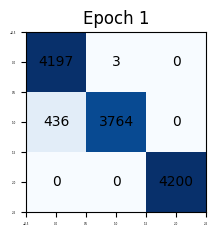

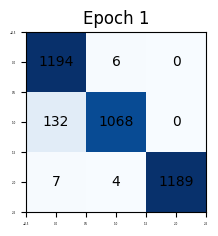

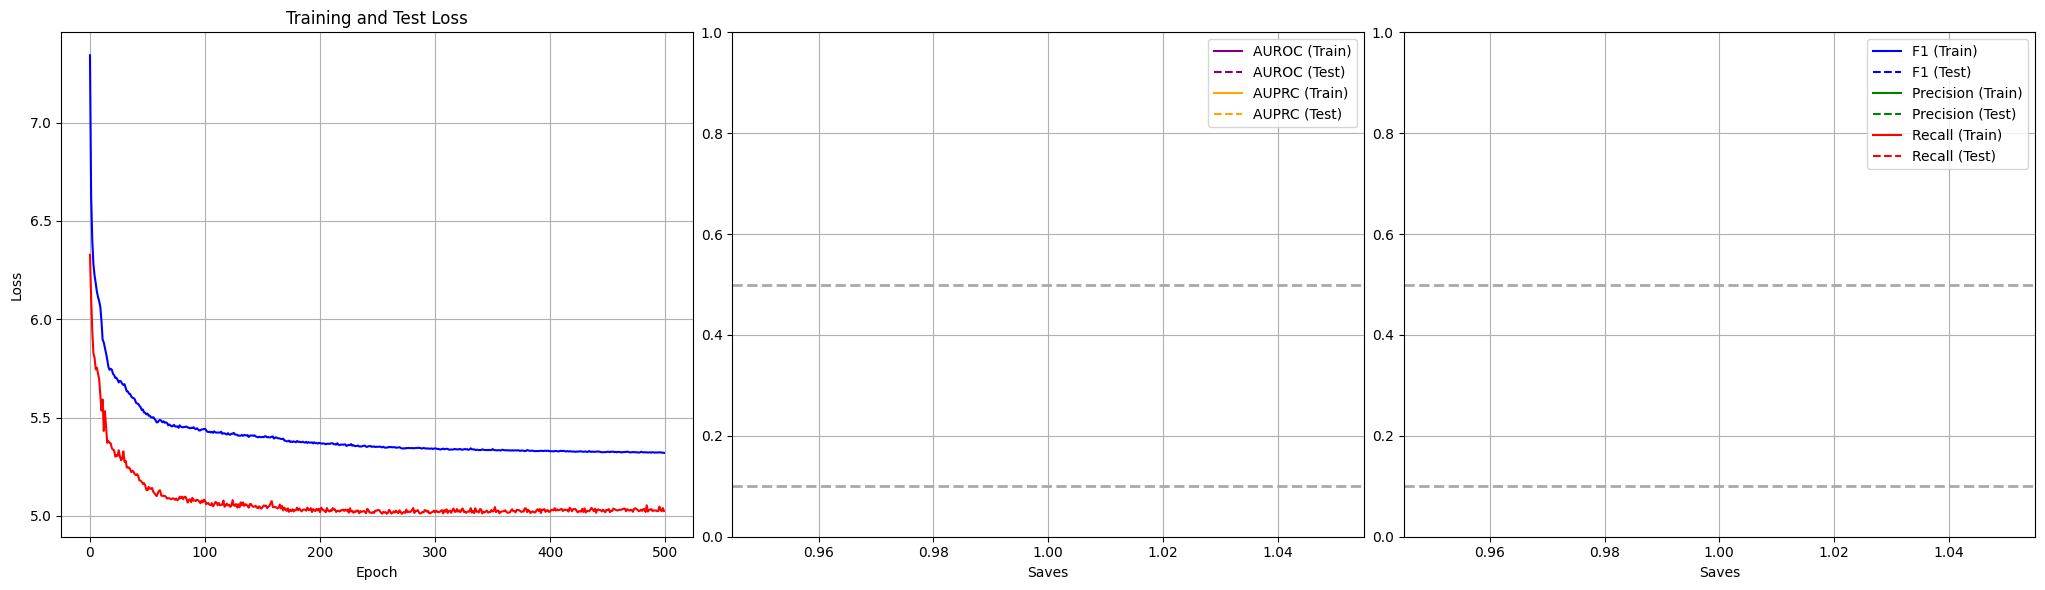

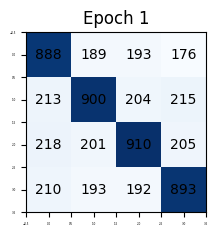

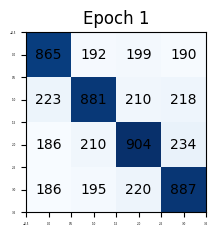

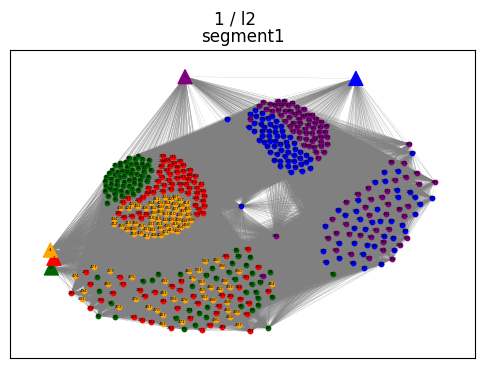

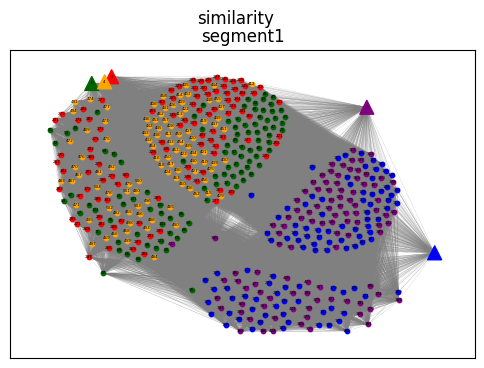

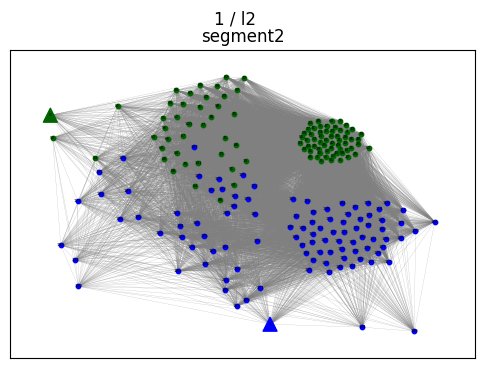

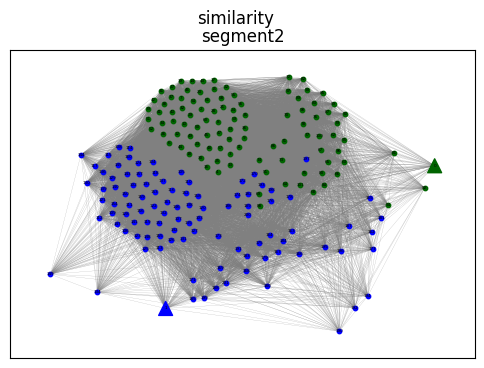

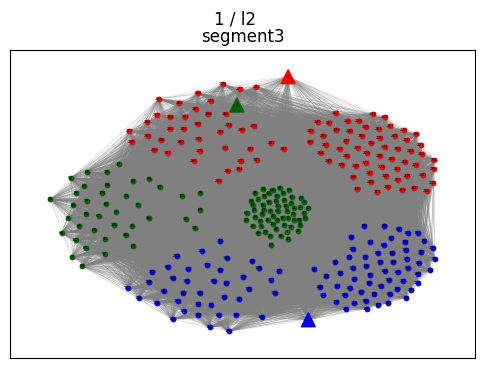

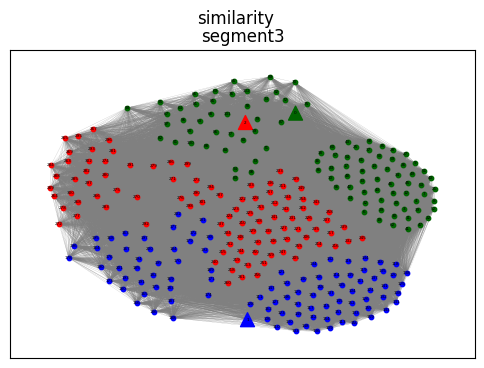

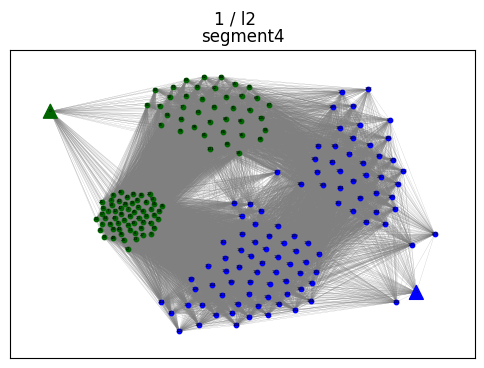

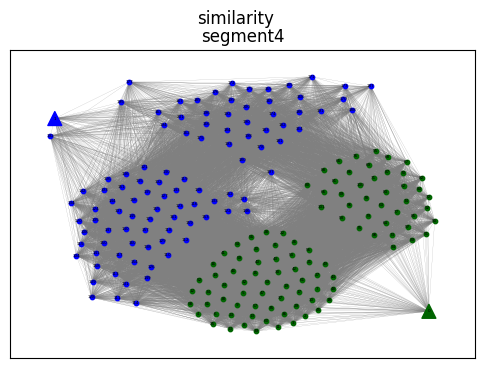

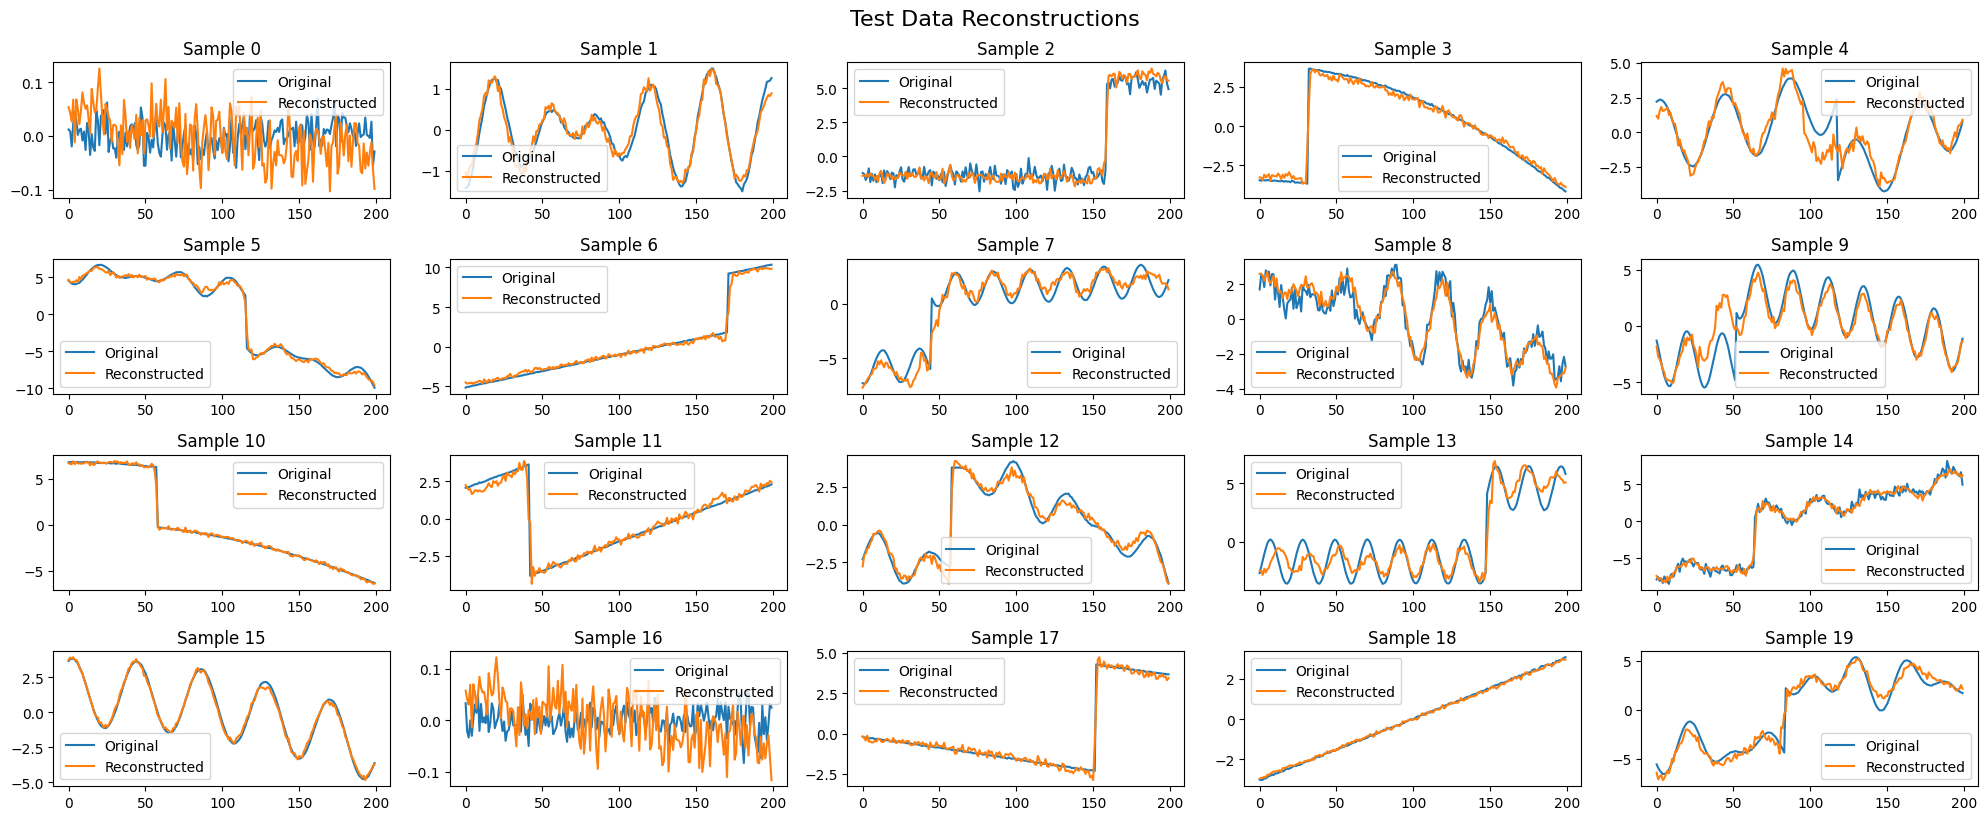

In [5]:
# # overwrite = False
# with open('run/train.py', 'r') as file:
#     exec(file.read())


# Generation

In [5]:
# tid=0
# # viz_generation_marginal(df_train, model, config_dict, tid=tid)
# viz_generation_conditional(df_train, model, config_dict, tid=tid, sampling=True, b=100, ep=200)

# Evaluation

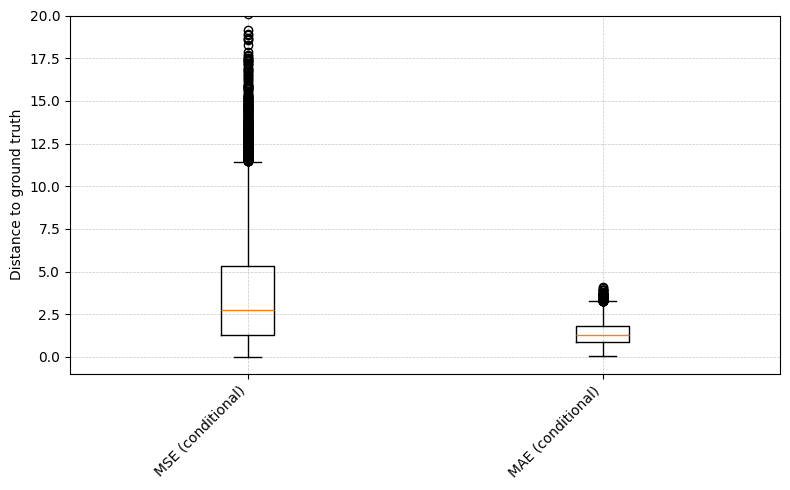

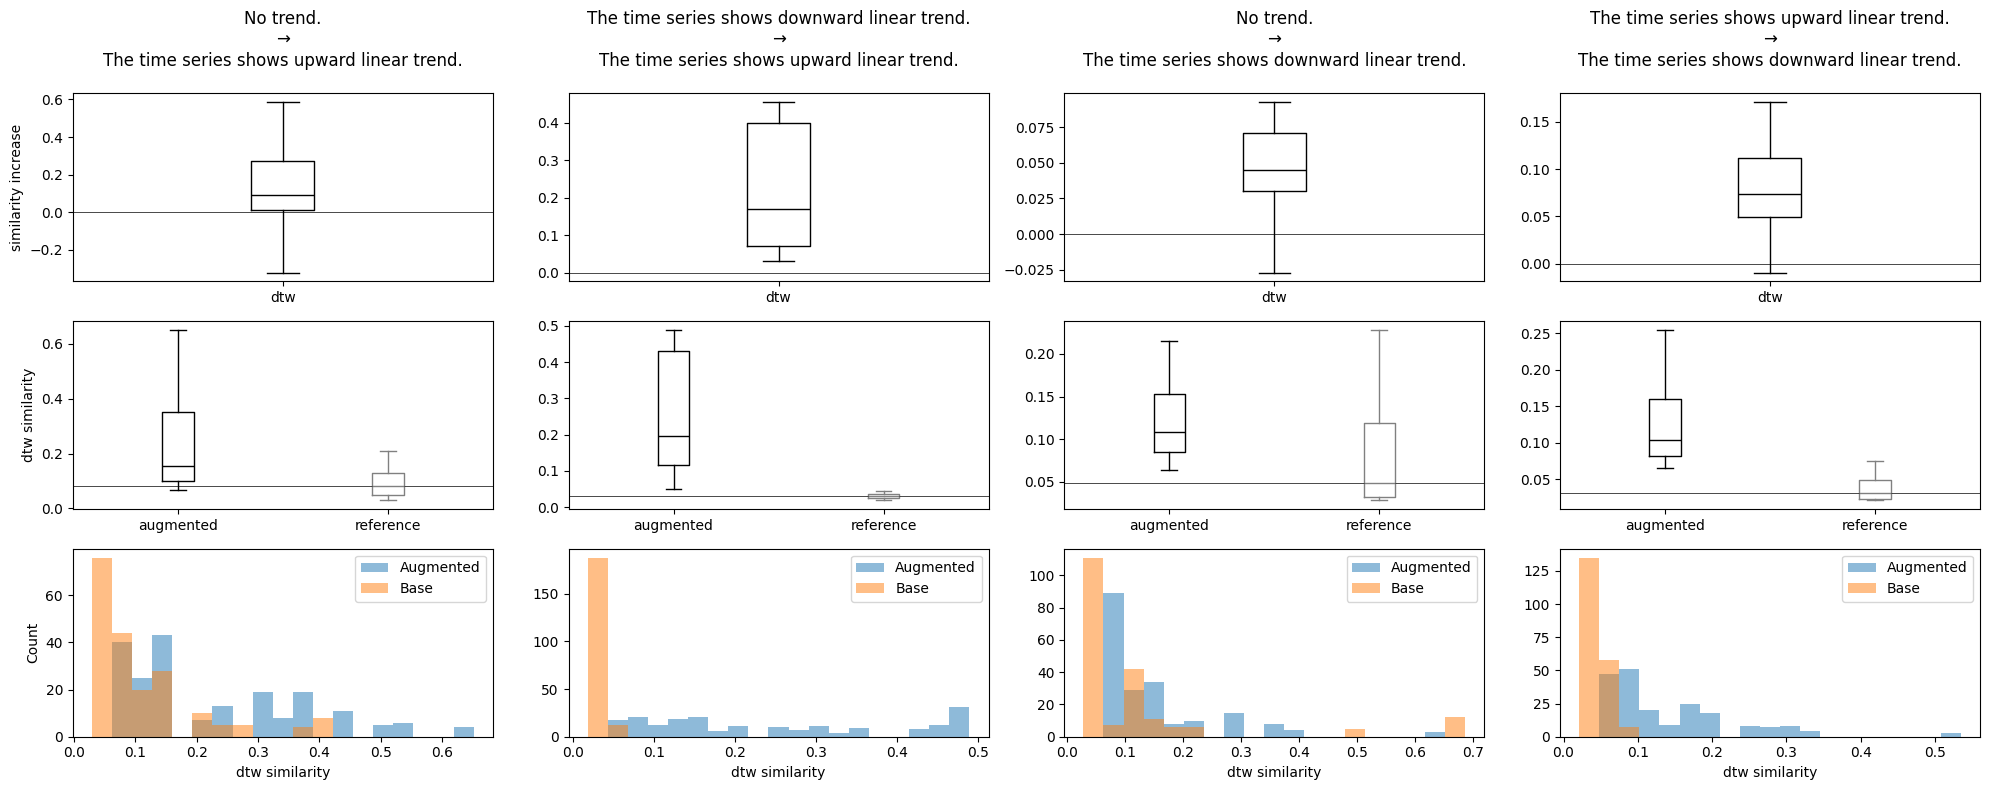

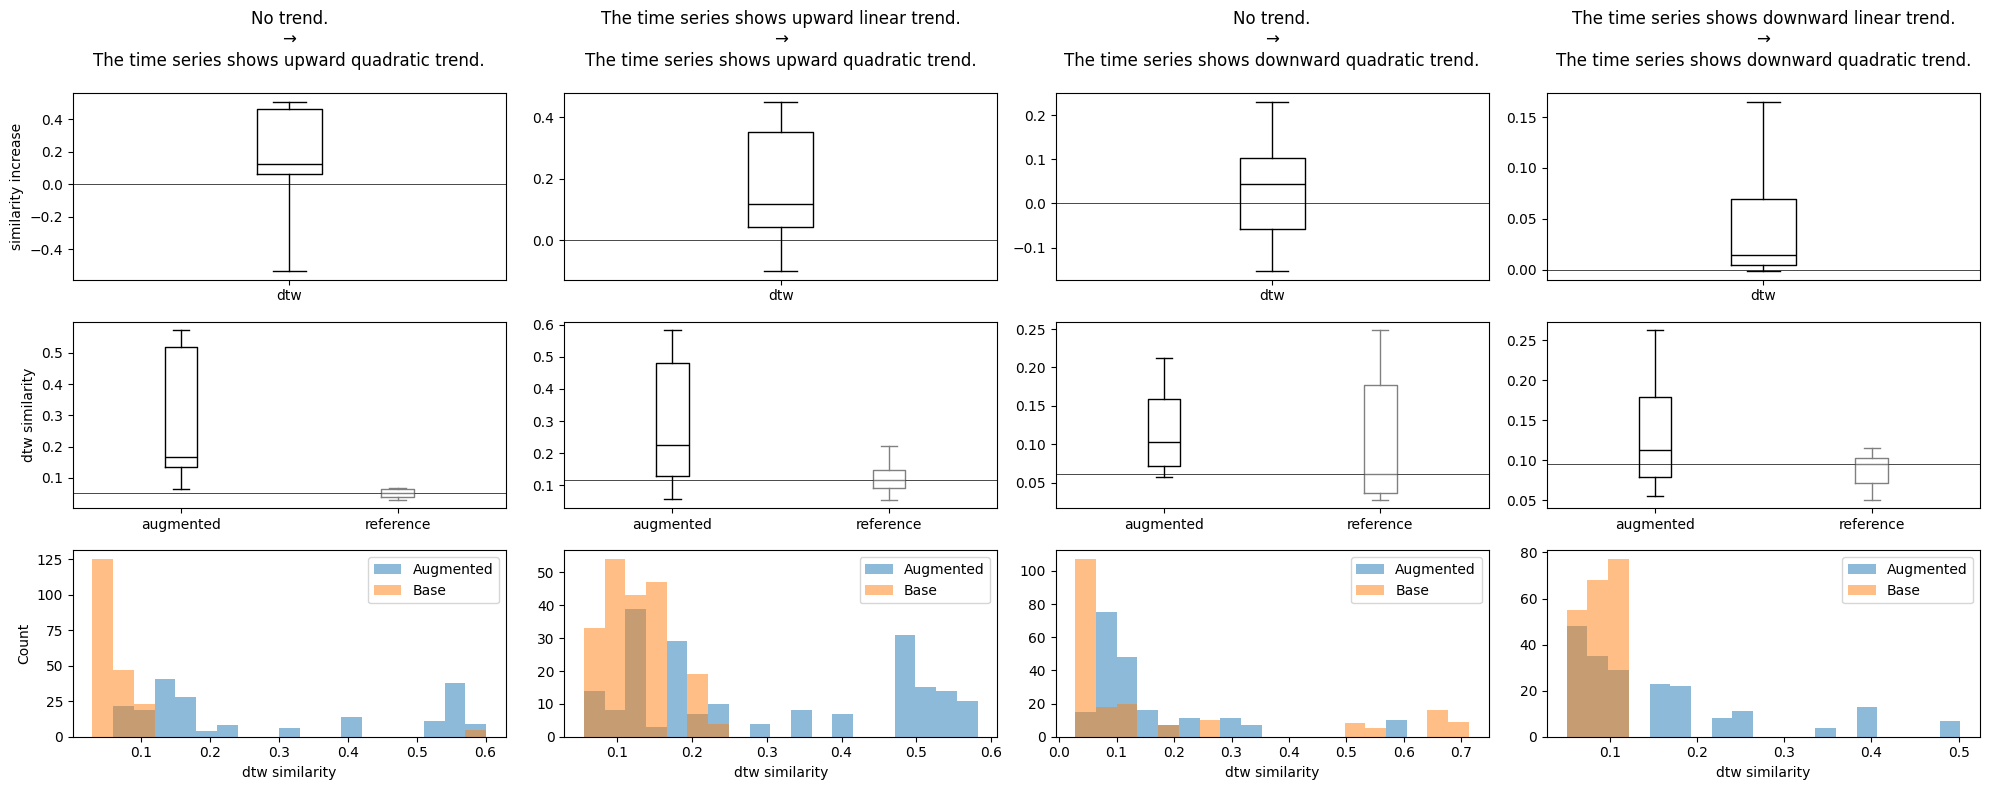

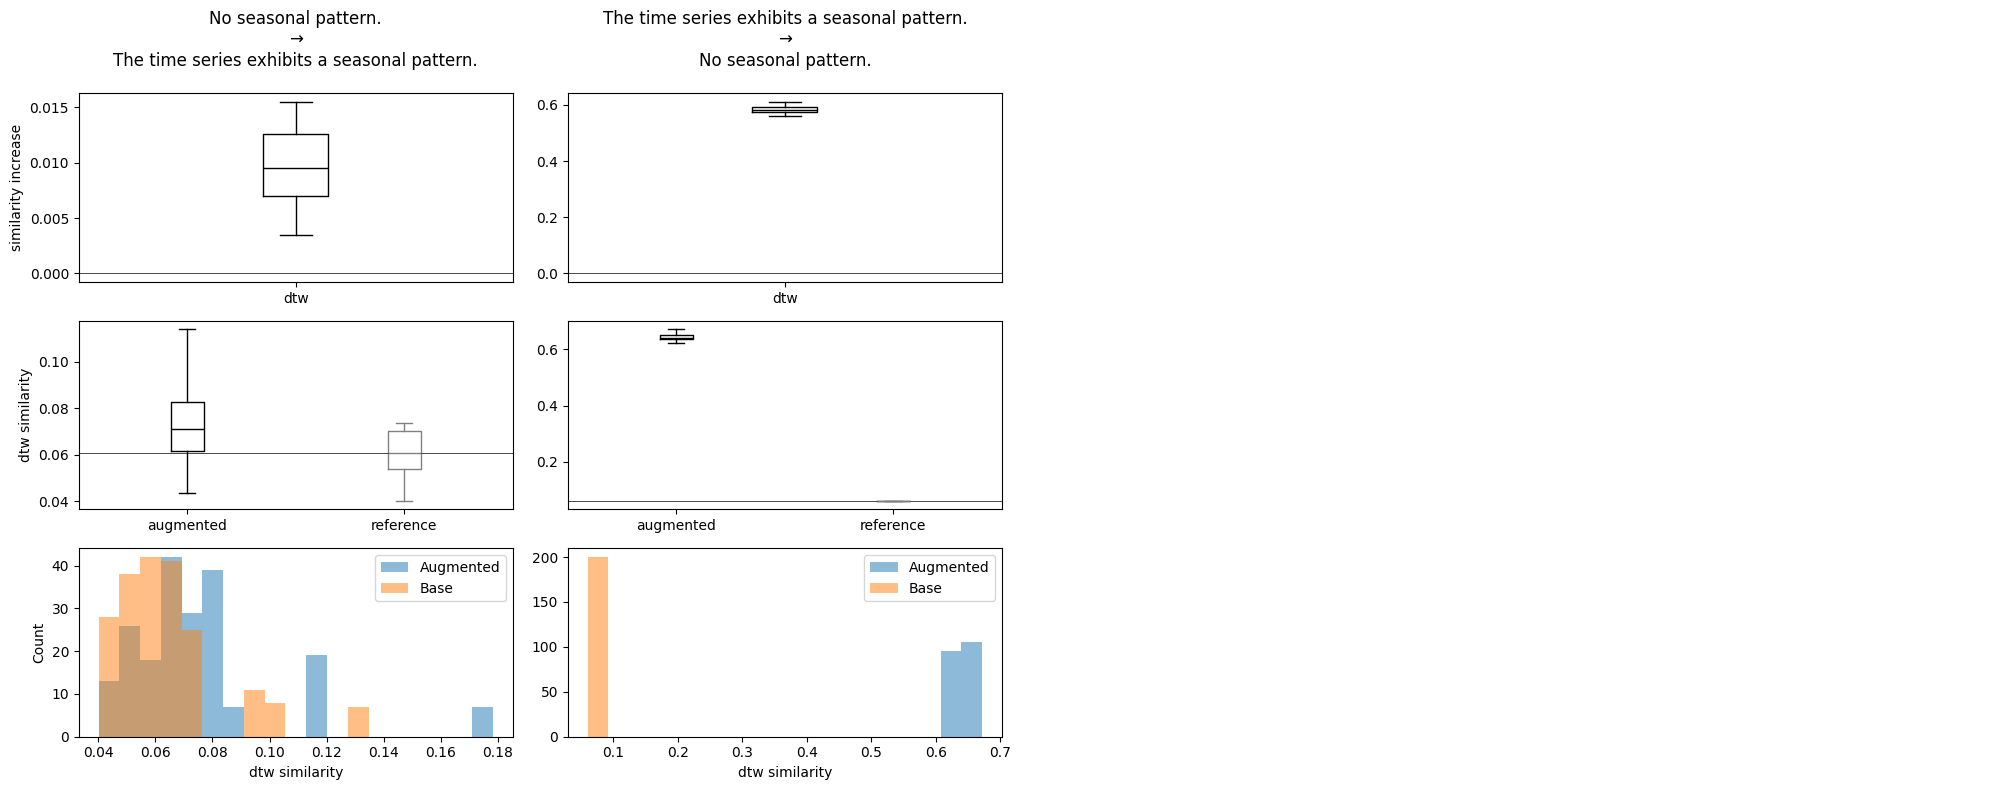

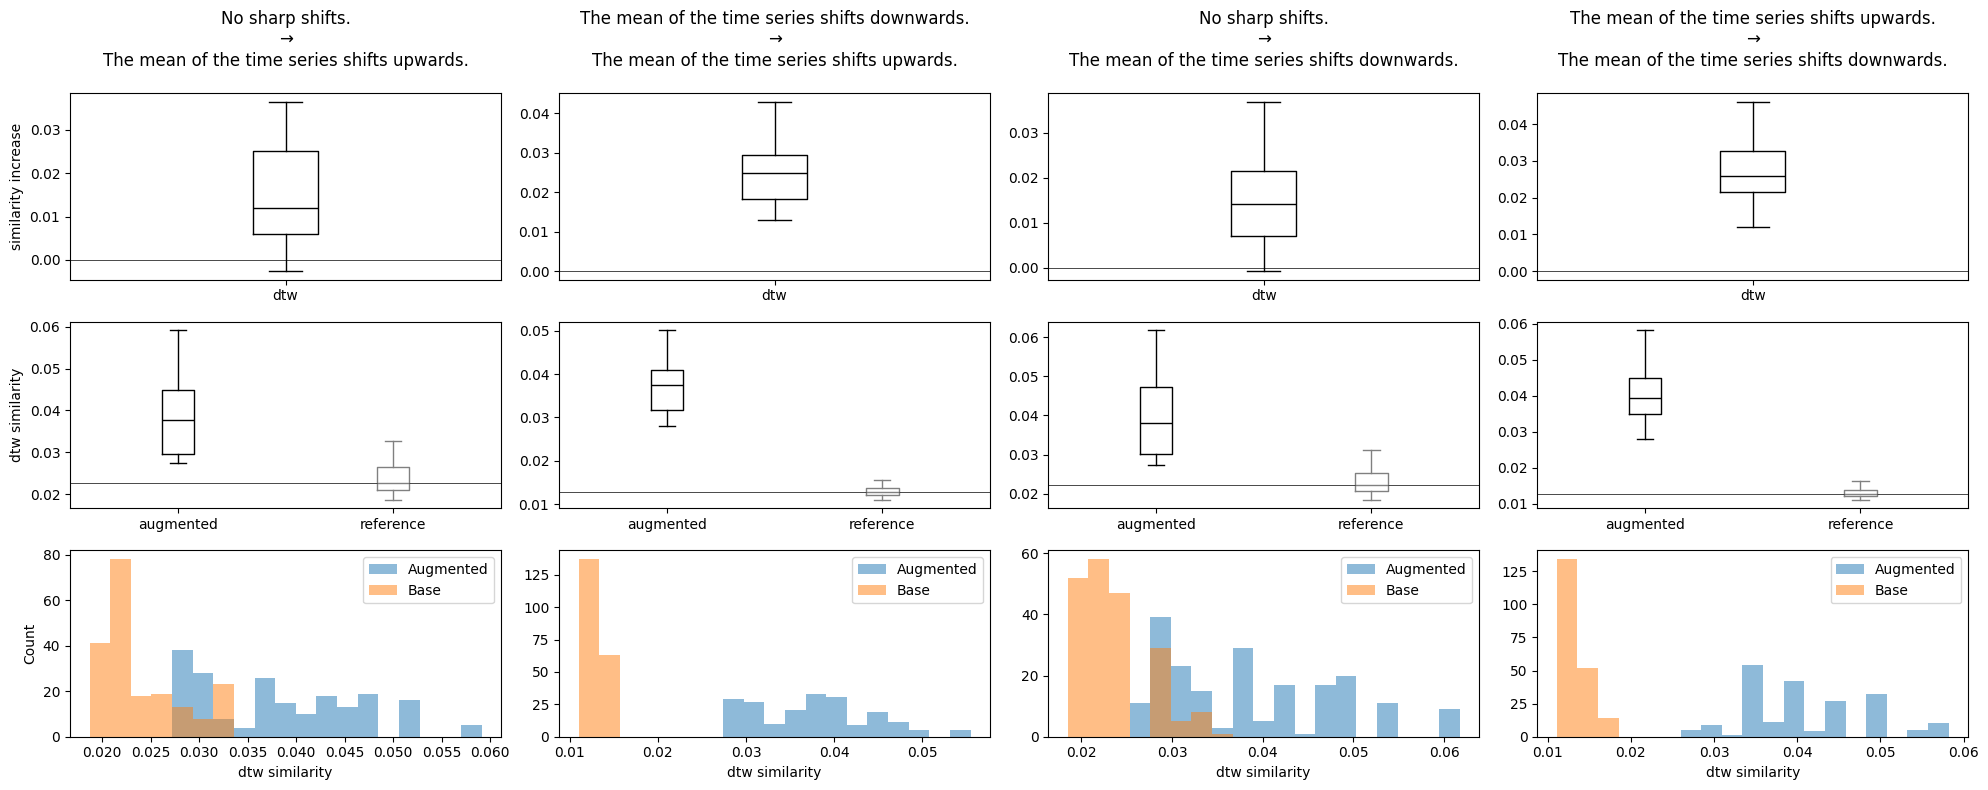

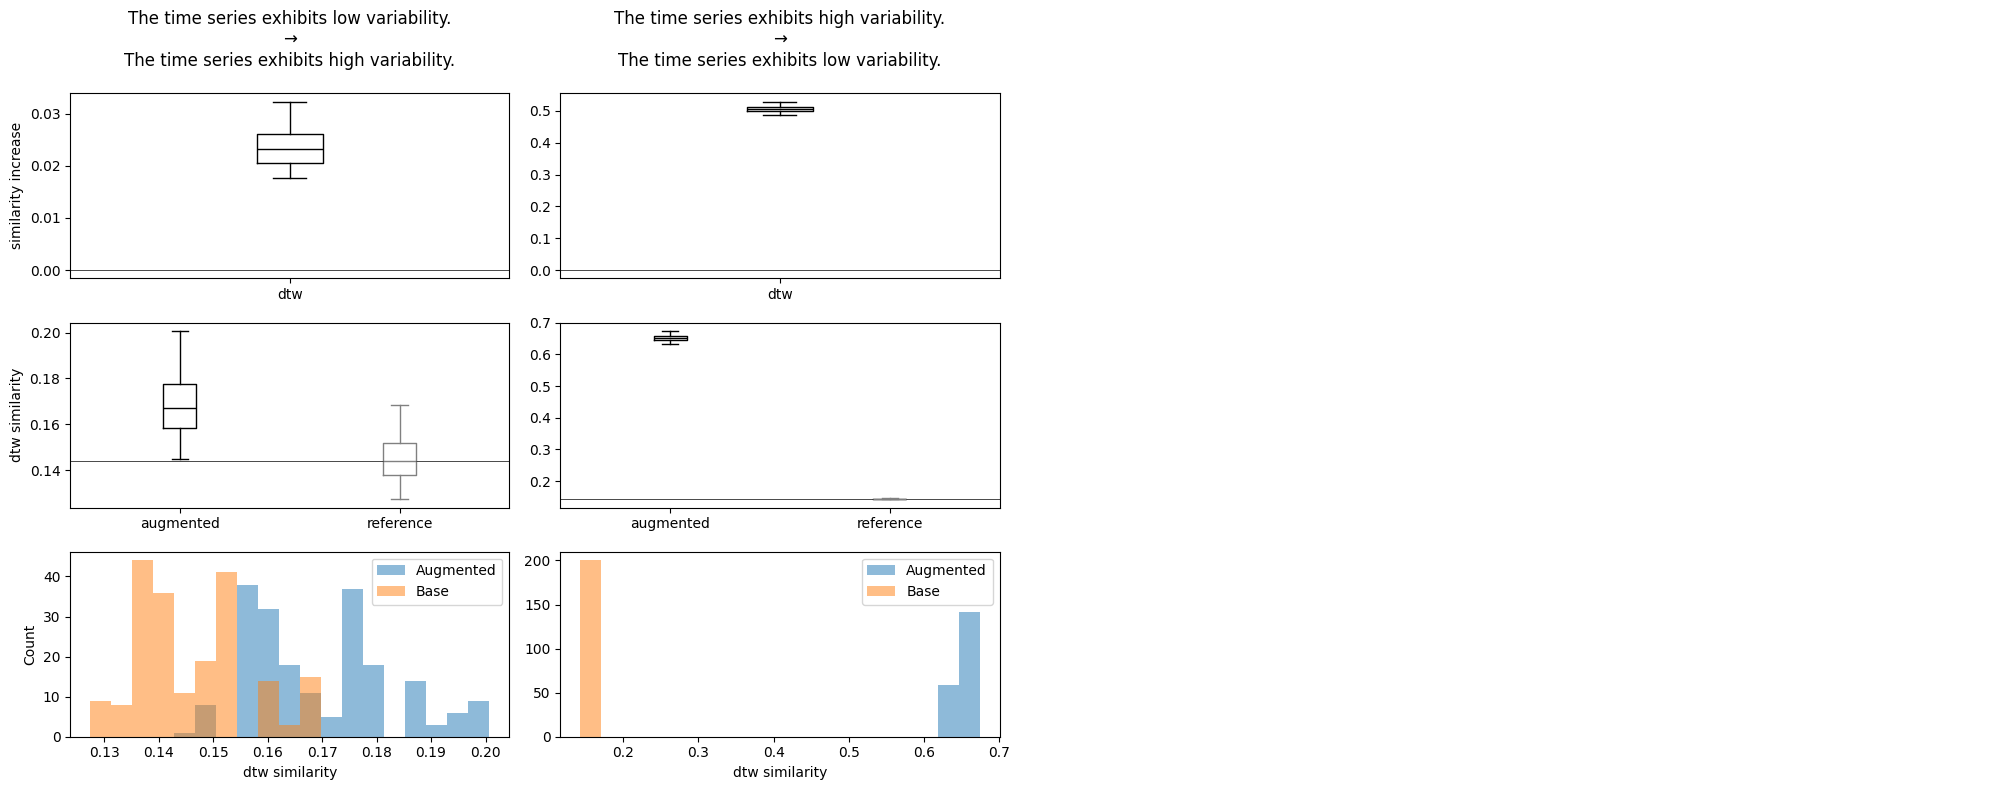

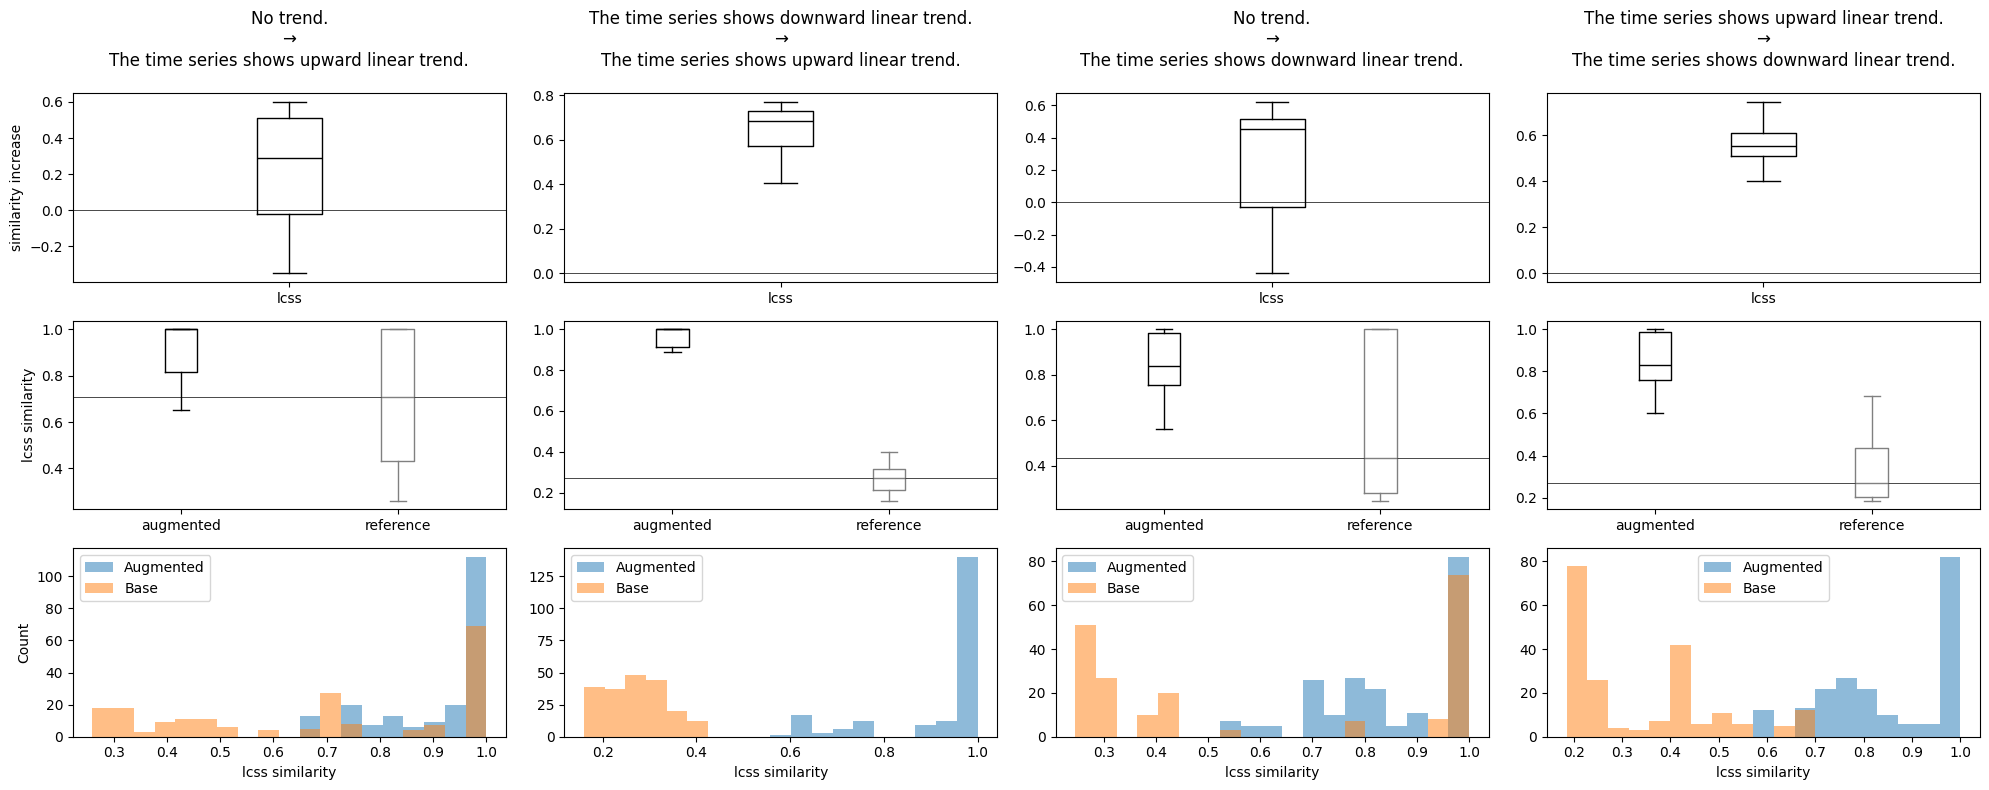

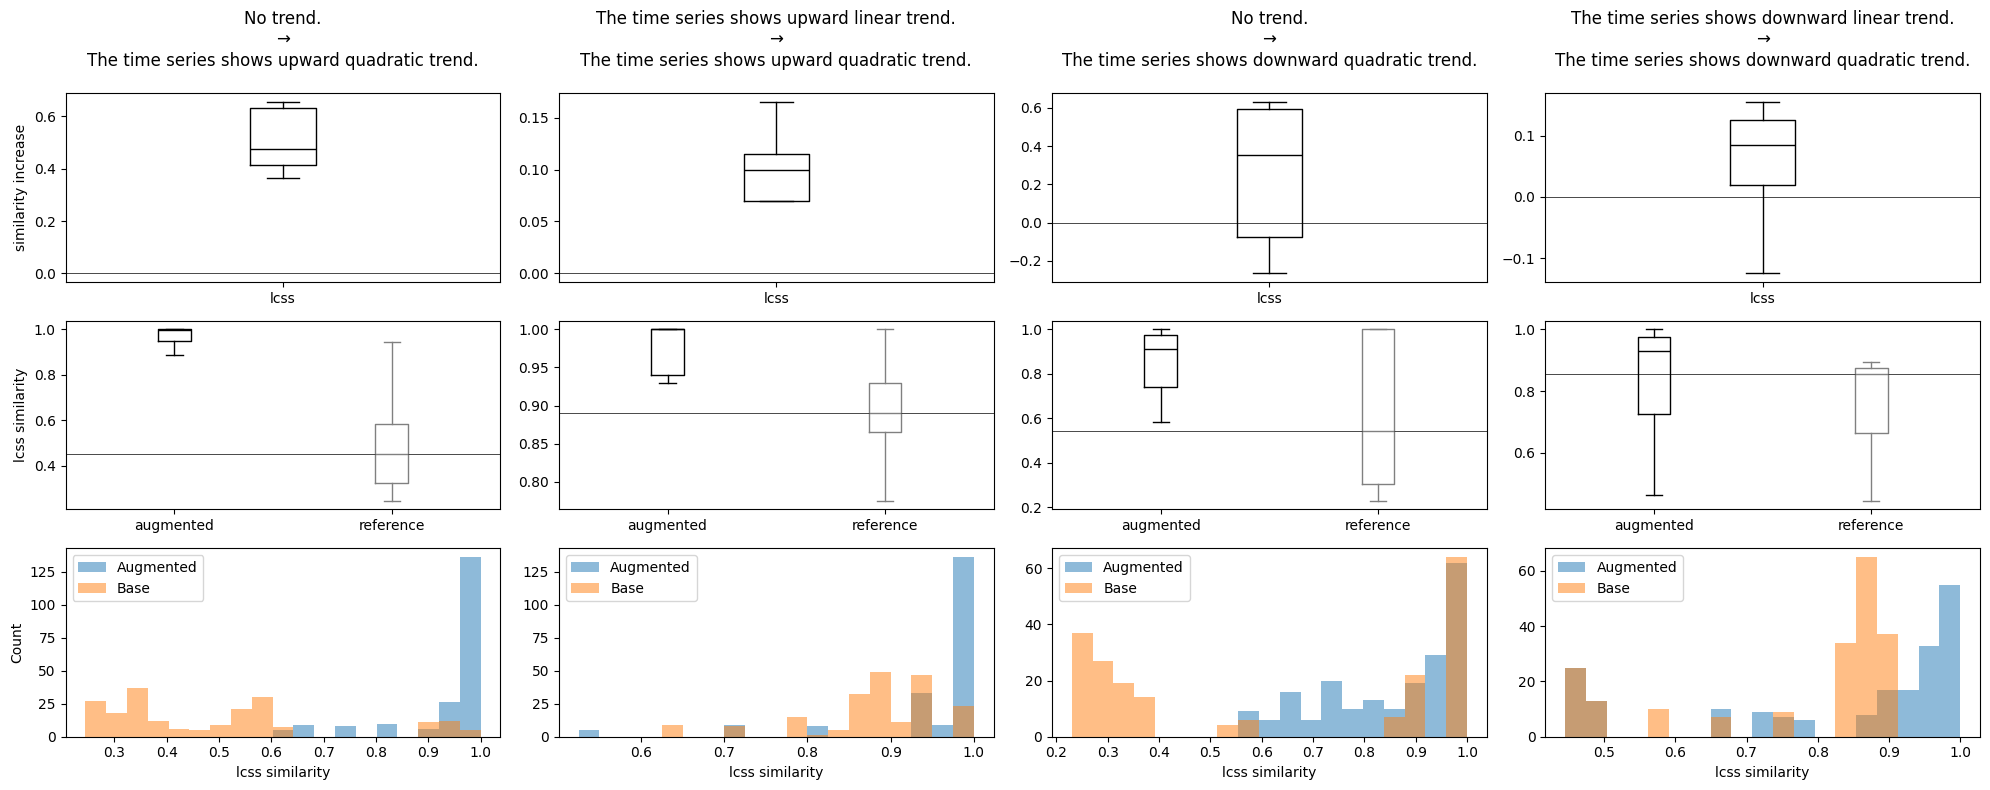

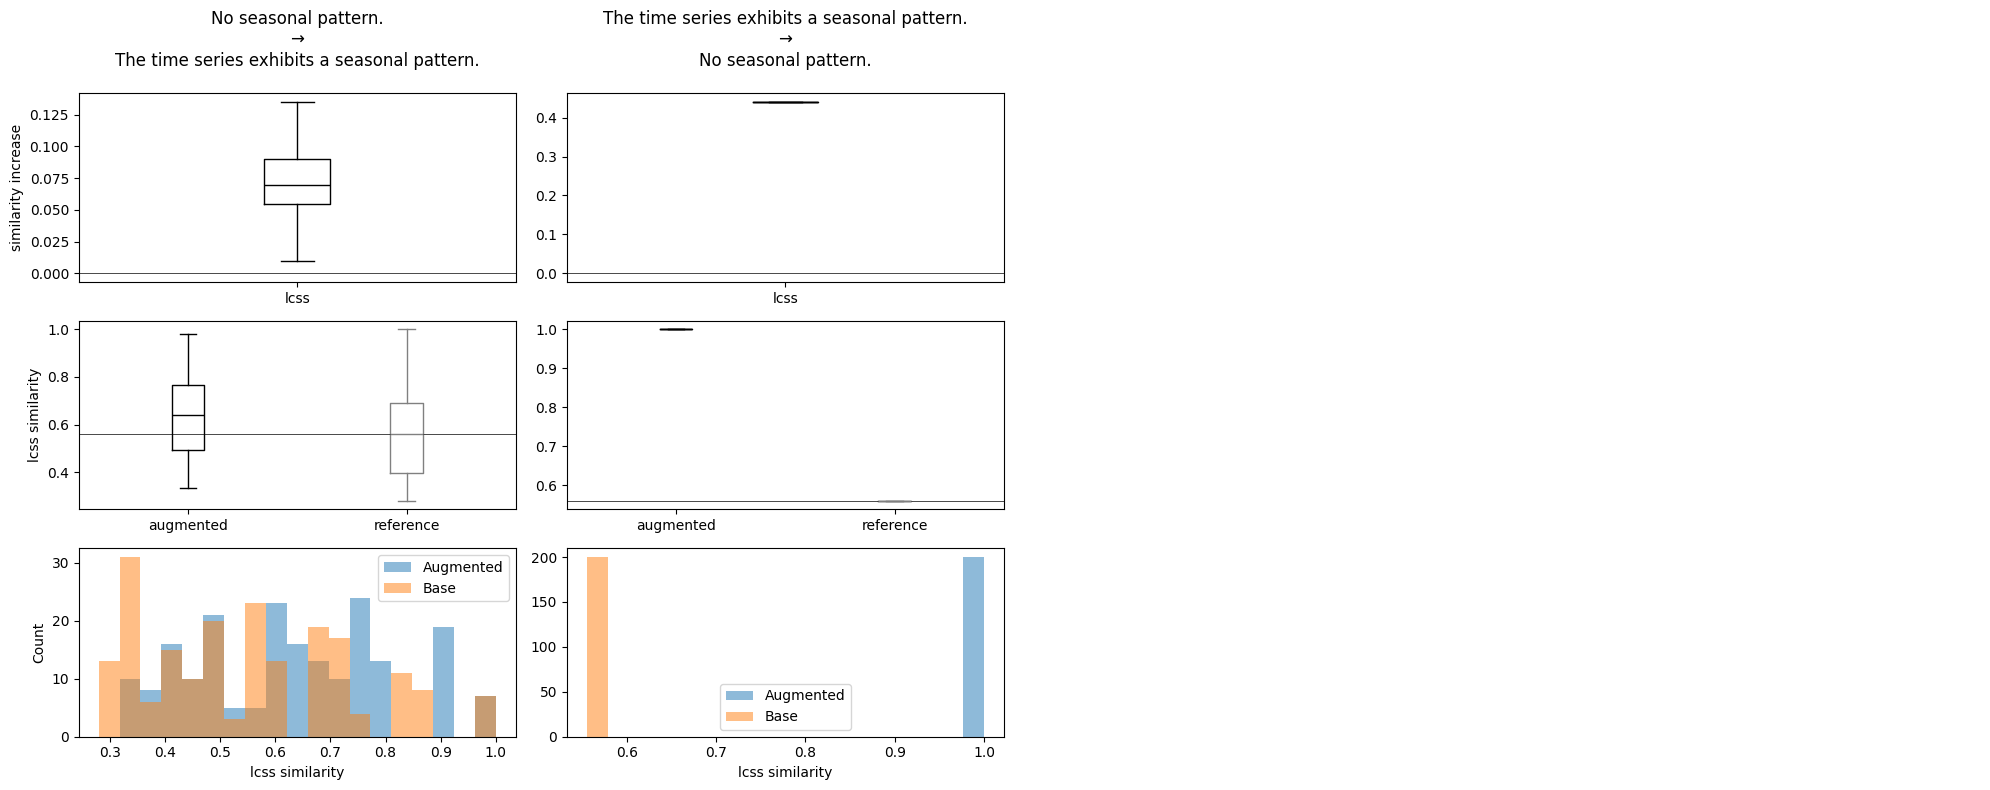

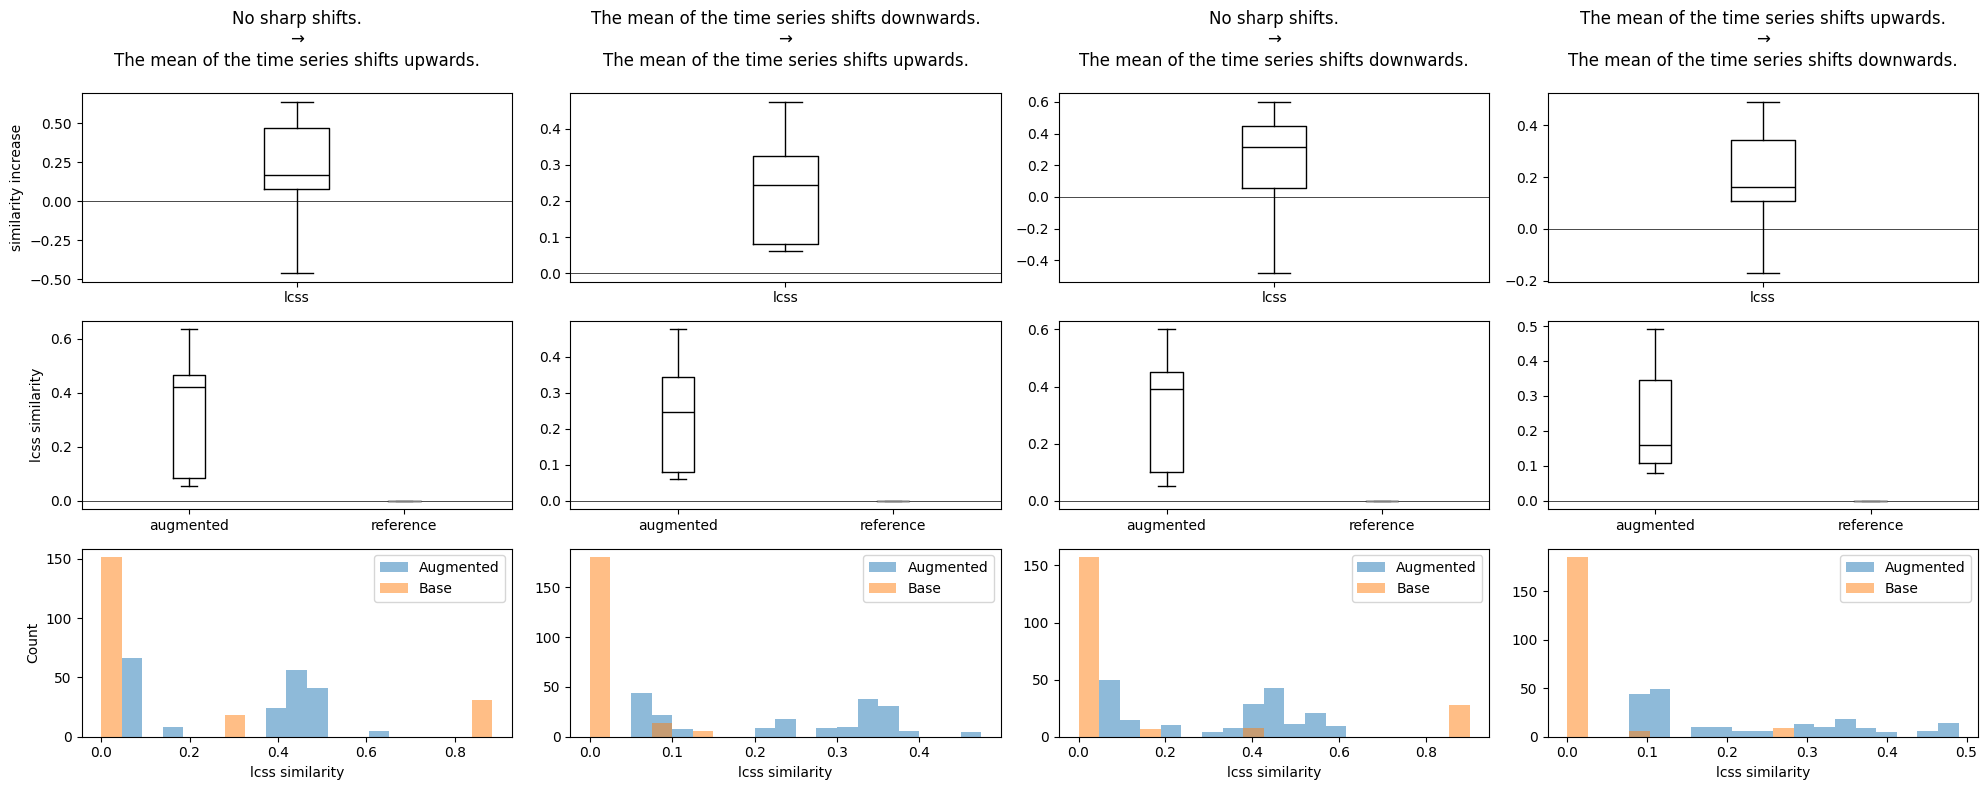

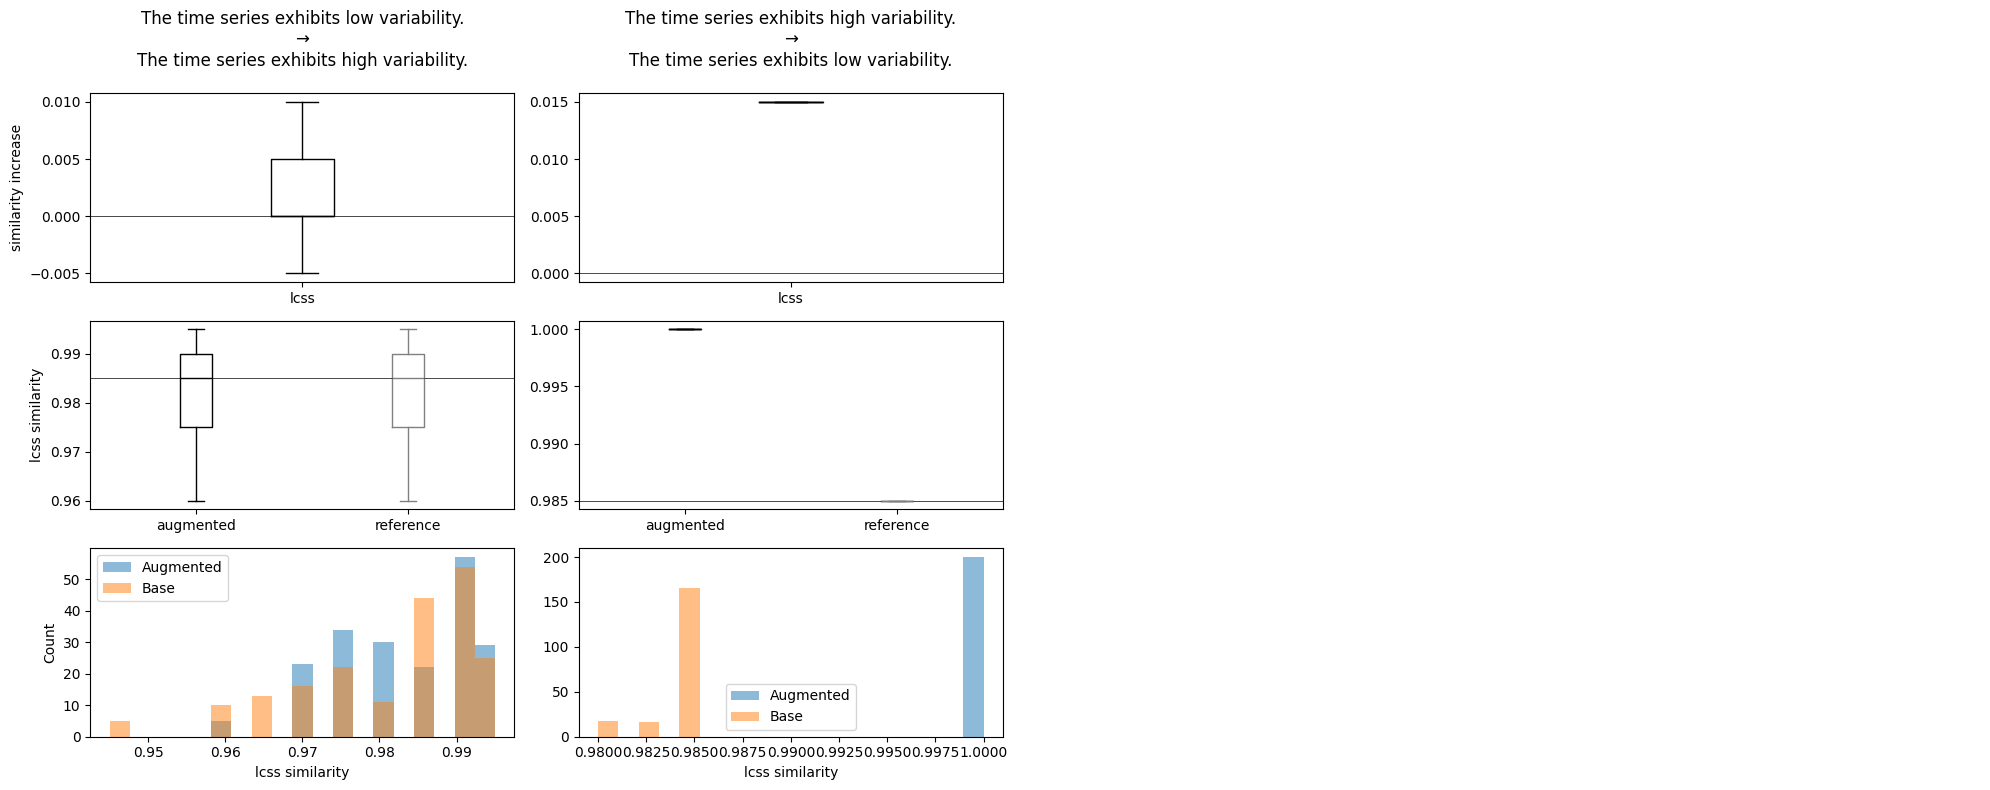

--------------------------------------------------------------------------------


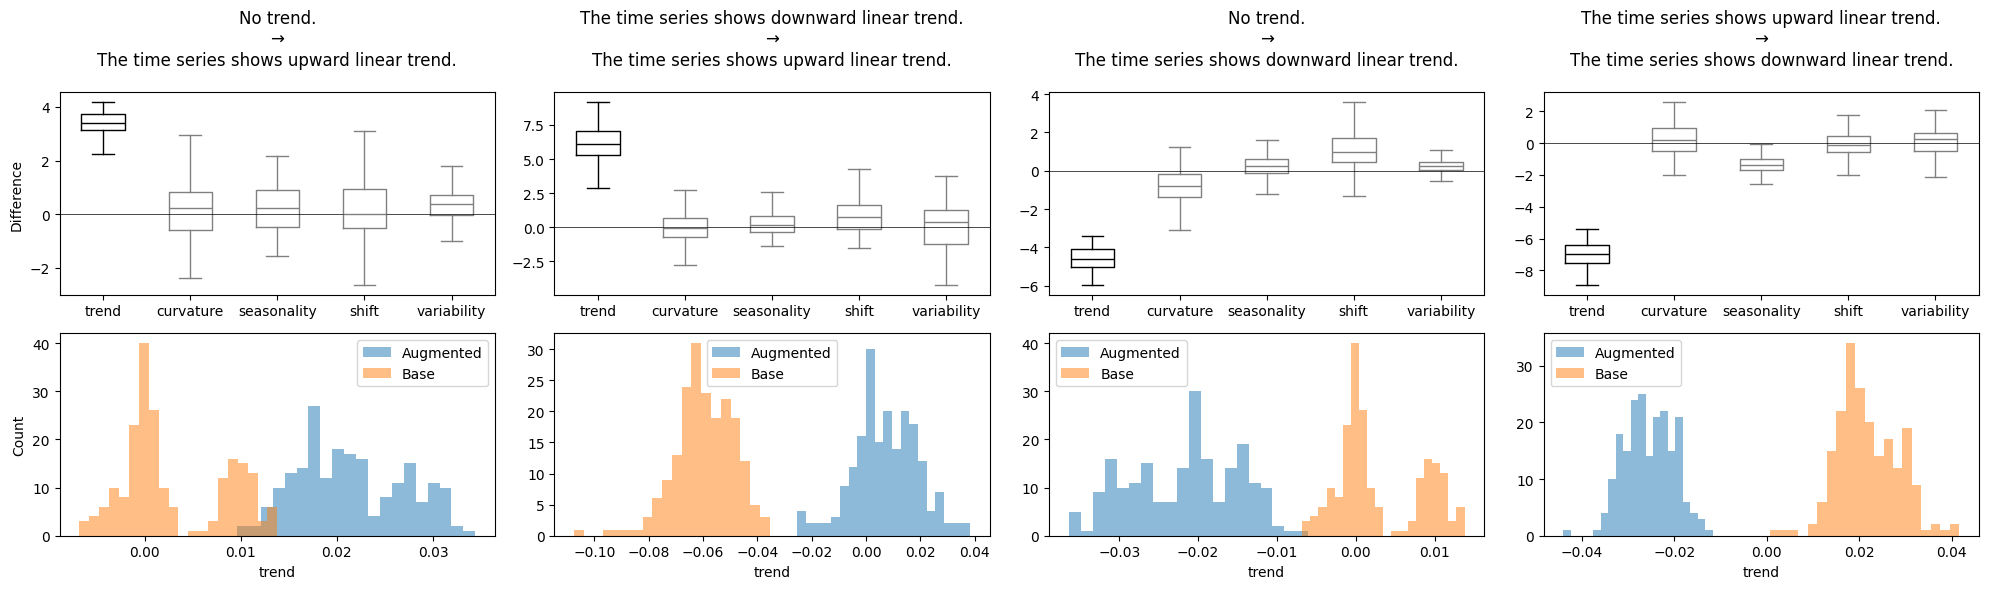

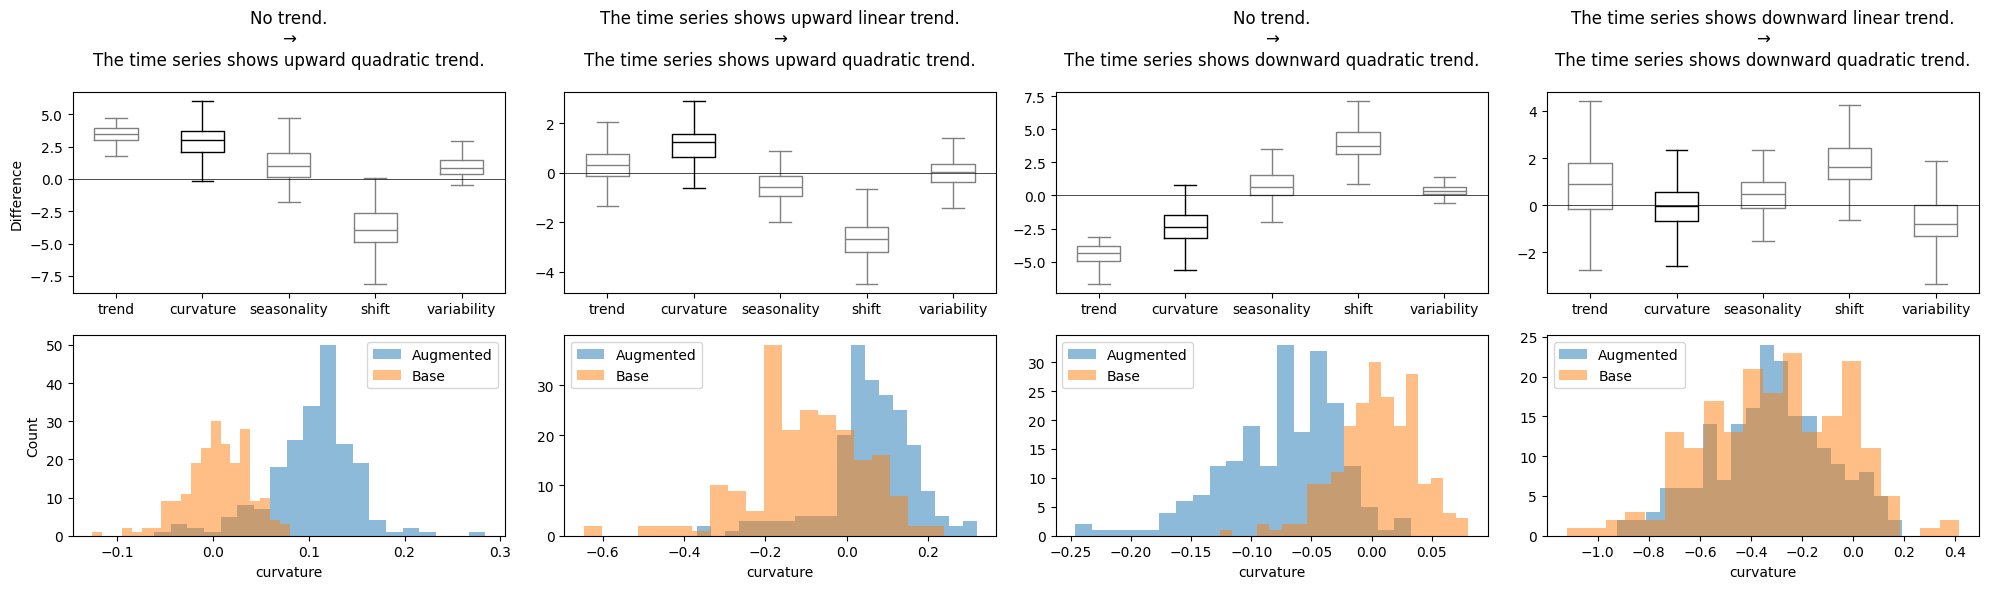

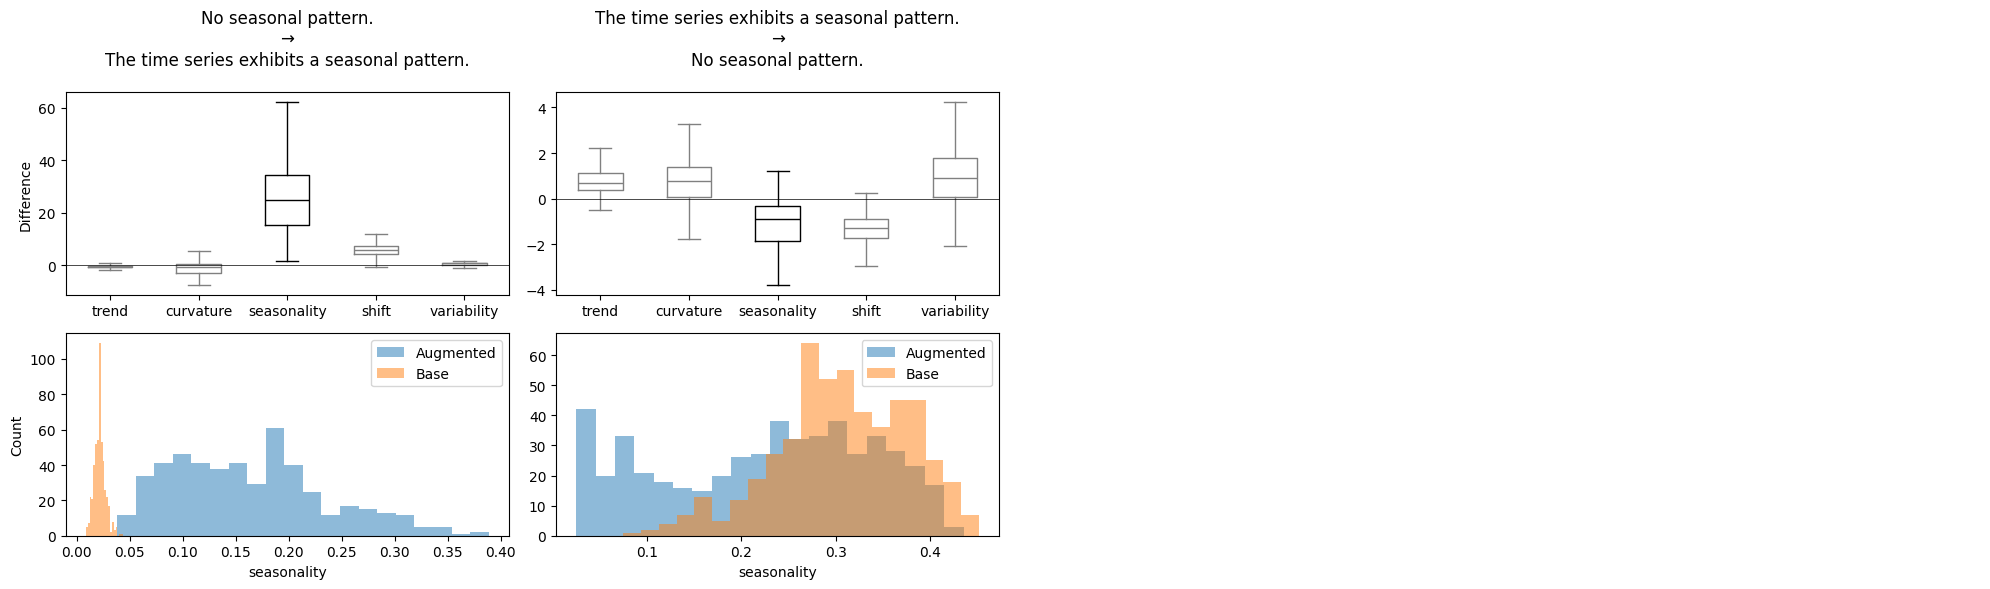

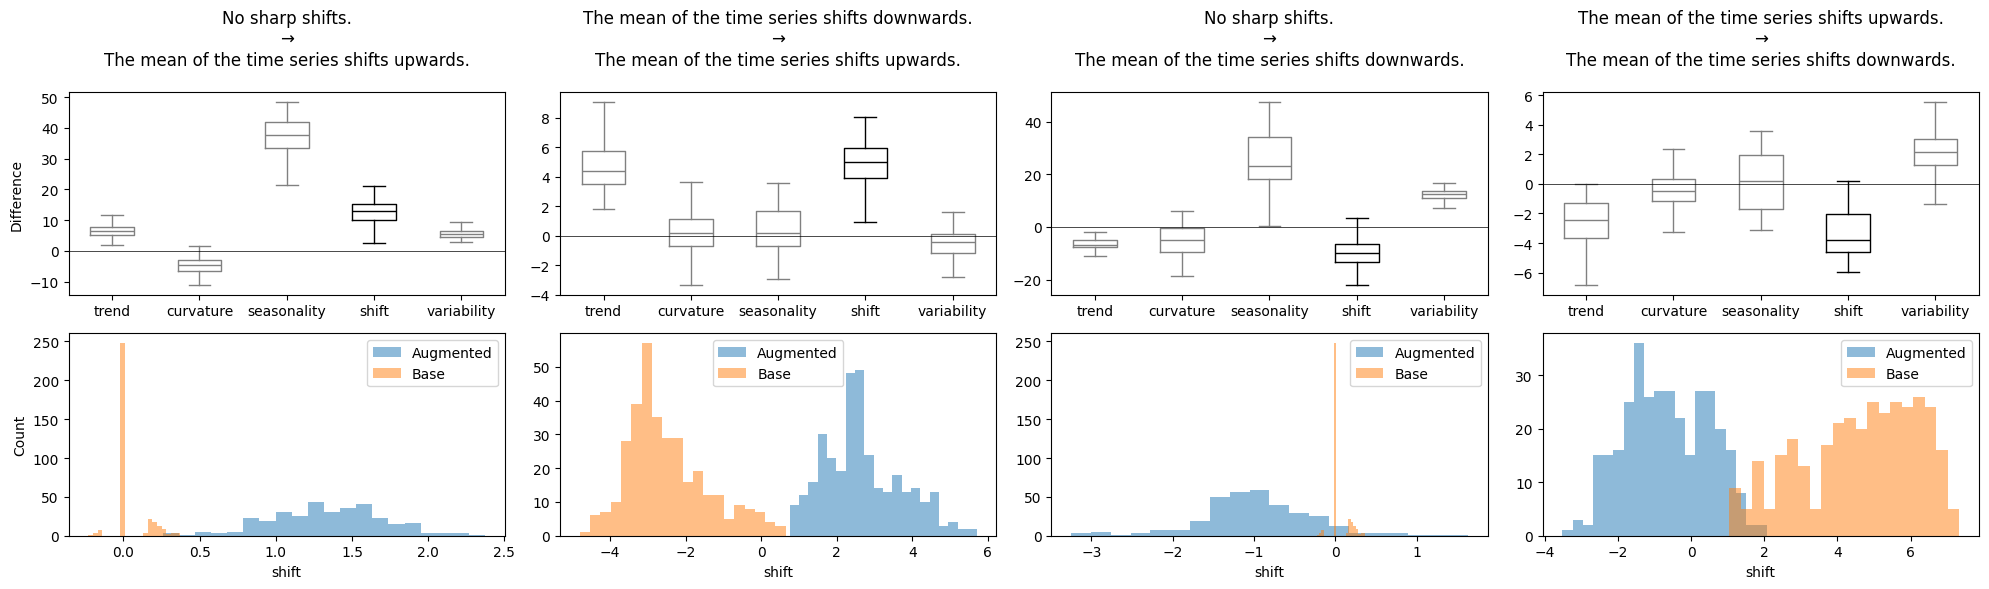

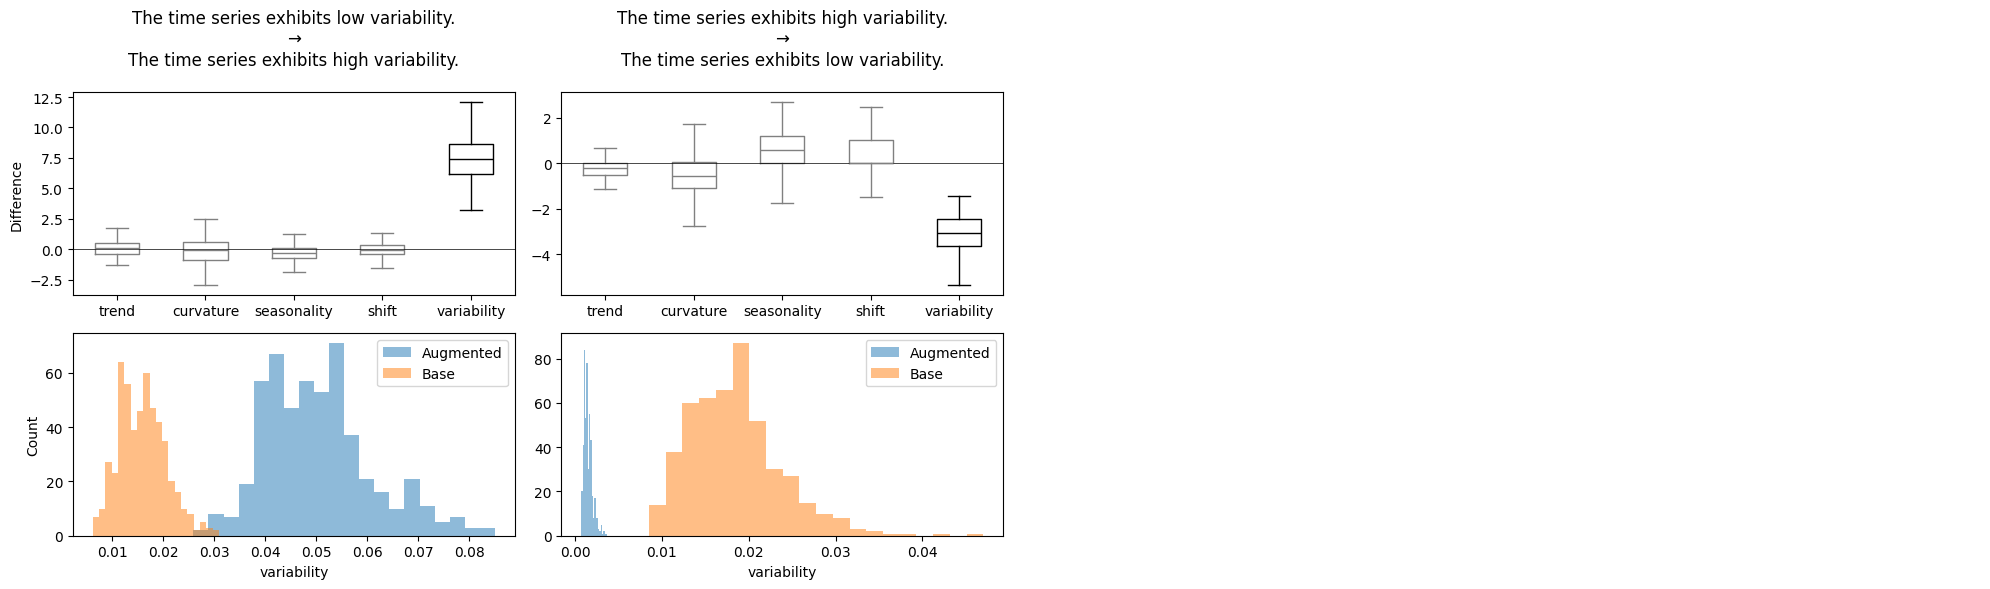

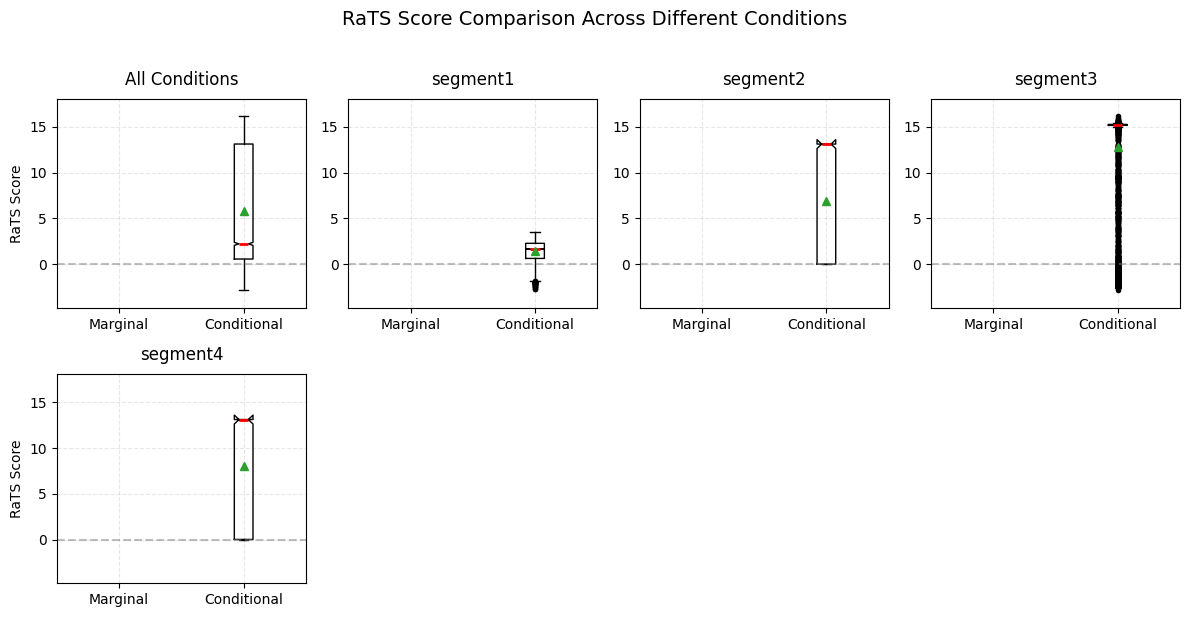

In [8]:
with open('run/eval.py', 'r') as file:
    exec(file.read())
with open('run/eng_eval.py', 'r') as file:
    exec(file.read())

In [9]:
df_all = pd.concat([df_rats_all, df_dists_all, df_pw_dists_all], ignore_index=True).dropna(subset=['score'])
summarize_scores(df_all)

metric,Point-wise MSE ↓,Point-wise MAE ↓,DTW similarity improvement ↑,LCSS similarity improvement ↑,RaTS ↑
final_score,"2.73 [1.28, 5.35]","1.29 [0.89, 1.84]","0.04 [0.02, 0.23]","0.14 [0.02, 0.47]","2.22 [0.56, 13.14]"
